**Types of plots**
- Scatter plot
- Line plot
- Histogram
- Bar Plot
- Density Plot
- Box Plot/Whisker Plot
- Heat Map
- Pie Chart

## Plotting libraries
1. Matplotlib - DYI
2. Seaborn
3. Plotly
4. Bokeh - DYI
4. Pandas [in-built plotting method](https://www.analyticsvidhya.com/blog/2021/06/plotting-visualizations-out-of-pandas-dataframes/)

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib
import numpy as np
import plotly.express as px
%matplotlib inline

## 2. Seaborn
- This library is based on matplotlib

![plots](https://seaborn.pydata.org/_images/function_overview_8_0.png)


[example gallery](https://seaborn.pydata.org/examples/index.html)

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
data = {}
for dataset in sns.get_dataset_names():
    a = sns.load_dataset(dataset)
    data[dataset] = a.shape

In [4]:
pd.DataFrame(data)

anagrams  anscombe  attention  brain_networks  car_crashes  diamonds  dots  \
0        20        44         60             923           51     53940   848   
1         5         3          5              63            8        10     5   

   exercise  flights  fmri  gammas  geyser  iris  mpg  penguins  planets  \
0        90      144  1064    6000     272   150  398       344     1035   
1         6        3     5       4       3     5    9         7        6   

   tips  titanic  
0   244      891  
1     7       15

In [5]:
penguins = sns.load_dataset('penguins').dropna().drop_duplicates()
penguins.head(5)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

In [6]:
penguins.shape

(333, 7)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

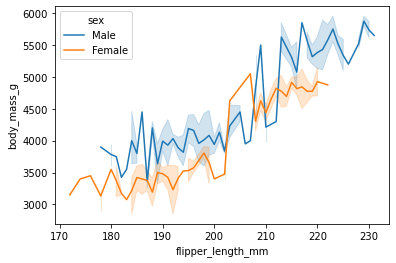

In [7]:
# line plot
sns.lineplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='sex')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

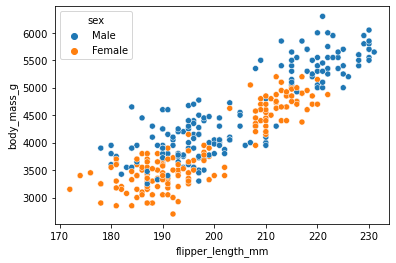

In [8]:
# scatter plot
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='sex')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

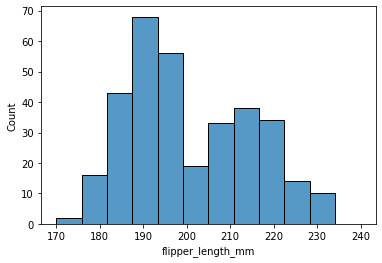

In [9]:
# histogram
sns.histplot(
    data=penguins,
    x='flipper_length_mm',
    binrange=(170,240)
)

In [10]:
# Bar Plot
mean_body_mass = penguins.groupby(['species', 'sex'])['body_mass_g'].mean()
mean_body_mass.reset_index()

species     sex  body_mass_g
0     Adelie  Female  3368.835616
1     Adelie    Male  4043.493151
2  Chinstrap  Female  3527.205882
3  Chinstrap    Male  3938.970588
4     Gentoo  Female  4679.741379
5     Gentoo    Male  5484.836066

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

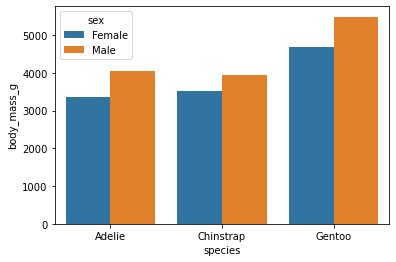

In [11]:
sns.barplot(data=mean_body_mass.reset_index(), x='species', y='body_mass_g', hue='sex')

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

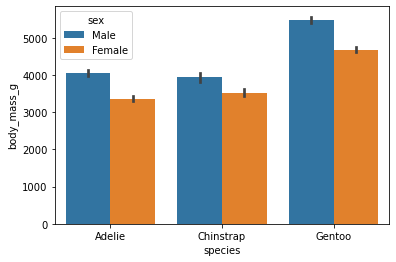

In [12]:
sns.barplot(data=penguins, x='species', y='body_mass_g', hue='sex') # median value is calculated

<AxesSubplot:ylabel='Density'>

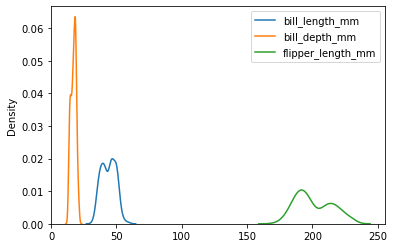

In [13]:
## Density Plot
sns.kdeplot(data=penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']])

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

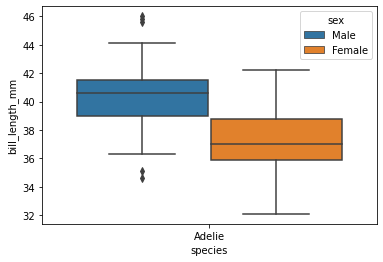

In [14]:
## Box
sns.boxplot(data=penguins[penguins['species']=='Adelie'], x='species', y='bill_length_mm', hue='sex')

<AxesSubplot:xlabel='year', ylabel='month'>

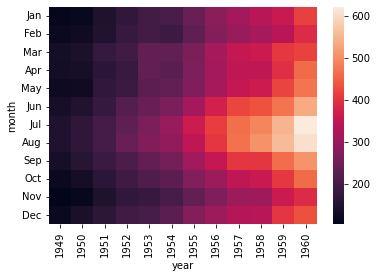

In [15]:
## Heat
flights = sns.load_dataset("flights").drop_duplicates()
flights_pivot = flights.pivot("month", "year", "passengers")
sns.heatmap(flights_pivot)

In [16]:
## Pie chart Not available in seaborn

## 4. Plotly

**Why use plotly?**
1. The visualizations are `interactive` unlike Seaborn and Matplotlib;
2. It’s quite straightforward to generate complicated visuals using `Plotly’s high-level Express API`;
3. Plotly also provides a framework known as `Plotly Dash` that you can use to host your visualizations as well as machine learning projects;
4. You can `generate HTML code` for your visualizations, if you like, you can embed this on your website

We interact with Plotly in 2 ways:
1. [Plotly Graph Objects](https://plotly.com/python/graph-objects/) - lower level API
2. [Plotly Express](https://plotly.com/python/plotly-express/) - High level API

[Online studio-chart](https://chart-studio.plotly.com/create/#/)

In [17]:
from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/FpCgG85g2Hw', height=420, width=820)

In [18]:
help(px.data)

Help on package plotly.express.data in plotly.express:

NAME
    plotly.express.data - Built-in datasets for demonstration, educational and test purposes.

PACKAGE CONTENTS


FUNCTIONS
    carshare()
        Each row represents the availability of car-sharing services near the centroid of a zone
        in Montreal over a month-long period.
        
        Returns:
            A `pandas.DataFrame` with 249 rows and the following columns:
            `['centroid_lat', 'centroid_lon', 'car_hours', 'peak_hour']`.
    
    election()
        Each row represents voting results for an electoral district in the 2013 Montreal
        mayoral election.
        
        Returns:
            A `pandas.DataFrame` with 58 rows and the following columns:
            `['district', 'Coderre', 'Bergeron', 'Joly', 'total', 'winner', 'result', 'district_id']`.
    
    election_geojson()
        Each feature represents an electoral district in the 2013 Montreal mayoral election.
        
        Returns

In [19]:
gapminder_dataset = px.data.gapminder()
type(gapminder_dataset)

pandas.core.frame.DataFrame

In [20]:
gapminder_dataset.sample(10)

country continent  year  lifeExp        pop  \
724                       Iran      Asia  1972   55.234   30614000   
1296     Sao Tome and Principe    Africa  1952   46.471      60011   
281                      Chile  Americas  1977   67.052   10599793   
1614             United States  Americas  1982   74.650  232187835   
258   Central African Republic    Africa  1982   48.295    2476971   
1144                    Norway    Europe  1972   74.340    3933004   
855                     Kuwait      Asia  1967   64.624     575003   
1060                   Namibia    Africa  1972   53.867     821782   
87                     Bahrain      Asia  1967   59.923     202182   
775                      Italy    Europe  1987   76.420   56729703   

         gdpPercap iso_alpha  iso_num  
724    9613.818607       IRN      364  
1296    879.583586       STP      678  
281    4756.763836       CHL      152  
1614  25009.559140       USA      840  
258     956.752991       CAF      140  
1144  18965.055510       NOR      578  
855   80894.883260       KWT      414  
1060   3746.080948       NAM      516  
87    14804.672700       BHR       48  
775   19207.234820       ITA      380

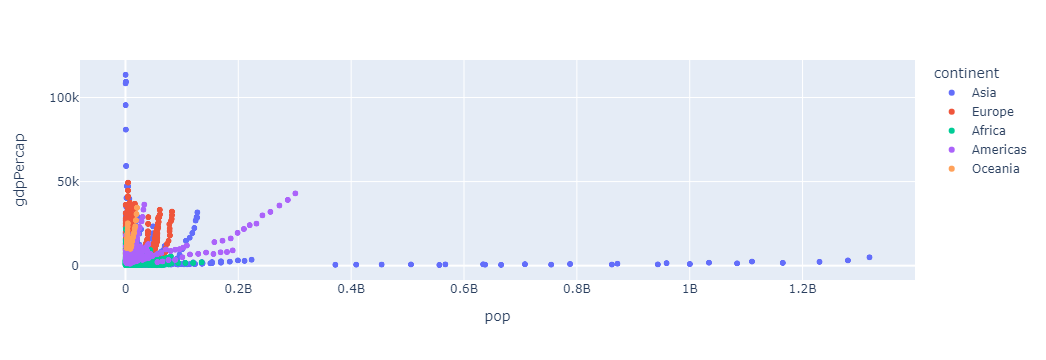

In [21]:
## Scatter plot
px.scatter(data_frame=gapminder_dataset, x='pop', y='gdpPercap', color='continent')

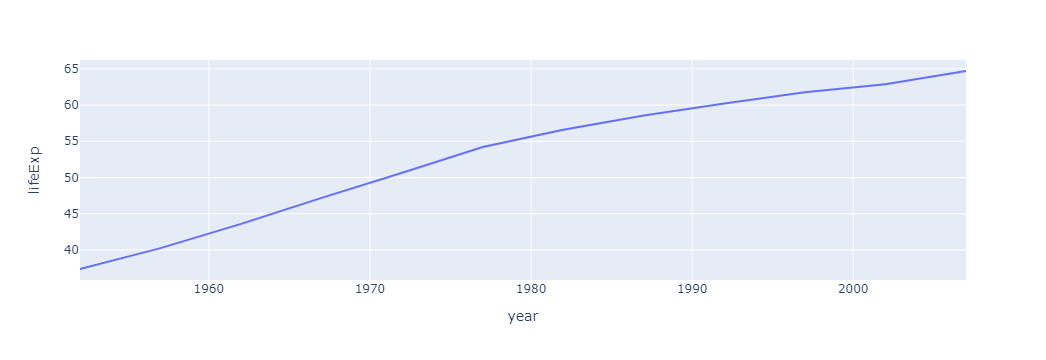

In [22]:
## Line plot
px.line(gapminder_dataset.query("country=='India'"), x='year', y='lifeExp')

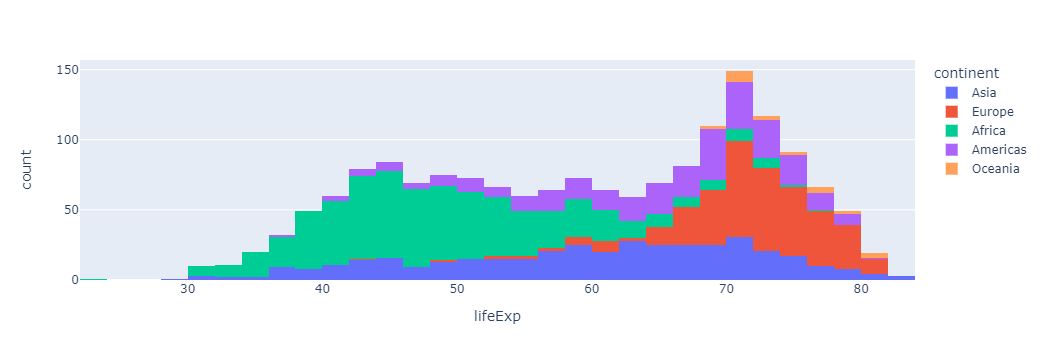

In [23]:
## Histogram
px.histogram(gapminder_dataset, x='lifeExp', color='continent')

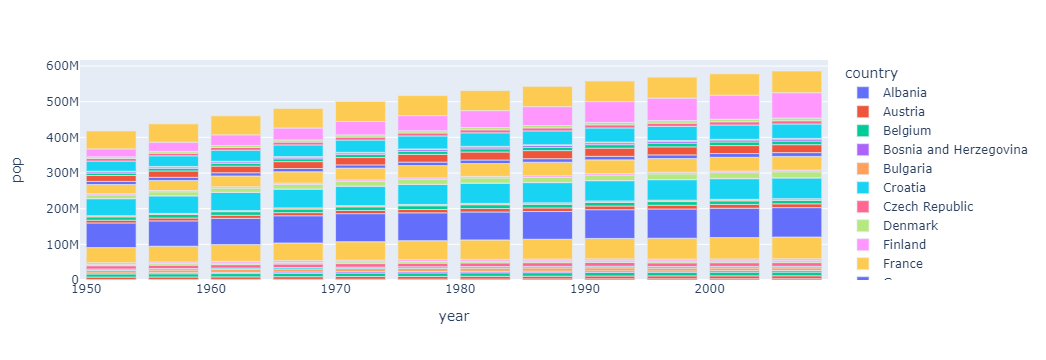

In [24]:
## Bar Plot
px.bar(gapminder_dataset.query("continent=='Europe'"), x='year', y='pop', color='country')

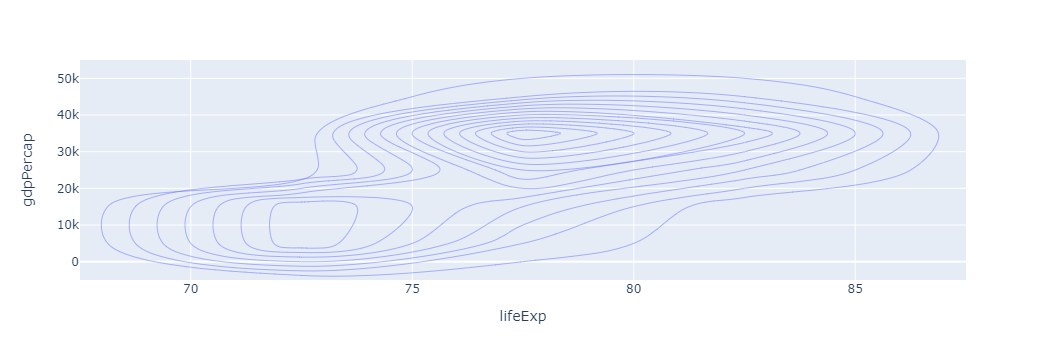

In [25]:
## Density Plot
px.density_contour(gapminder_dataset.query("year==2007 and continent=='Europe'"), x='lifeExp', y='gdpPercap')

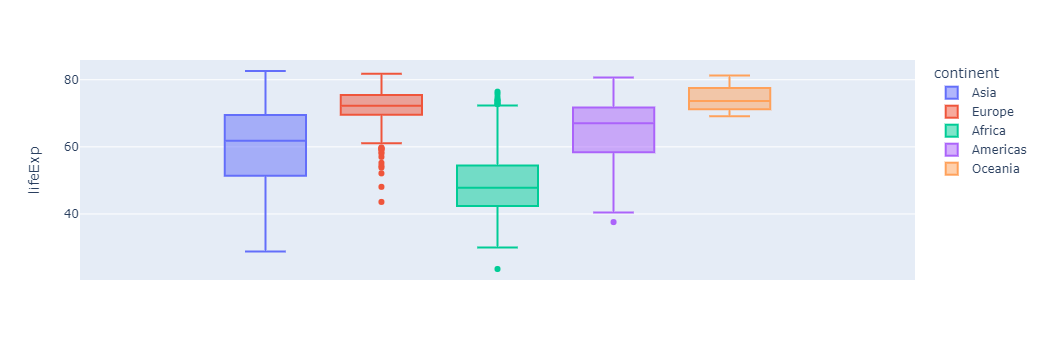

In [26]:
## Box Plot/Whisker Plot
px.box(gapminder_dataset, y='lifeExp', color='continent')

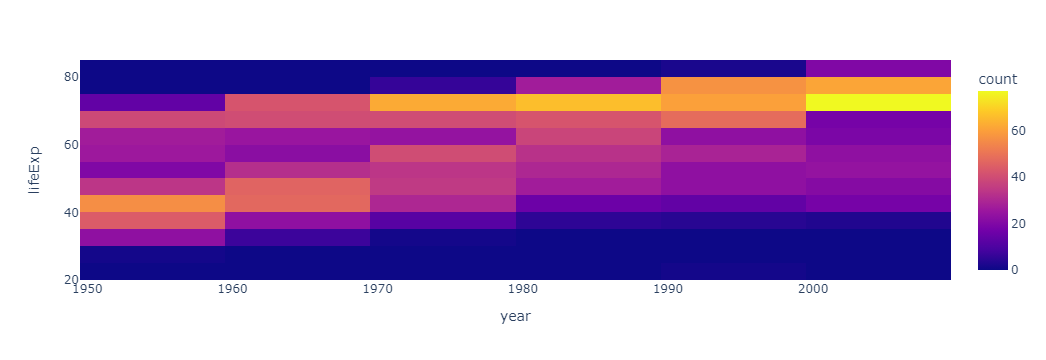

In [27]:
## Heat Map
px.density_heatmap(gapminder_dataset, x='year', y='lifeExp')

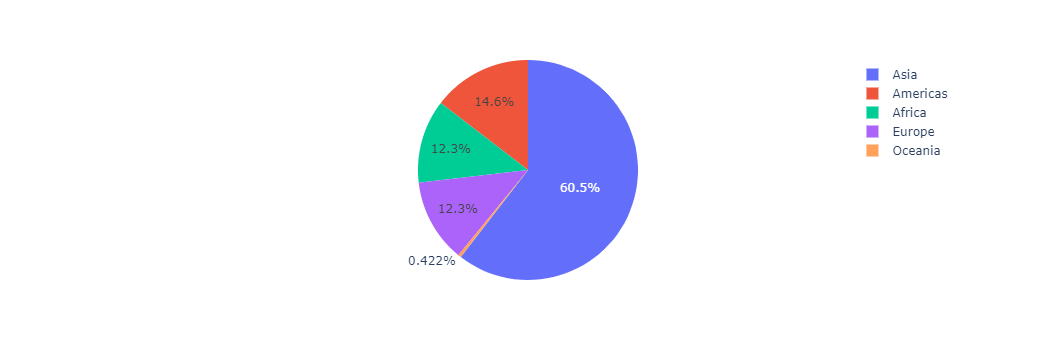

In [28]:
## Pie Chart
px.pie(gapminder_dataset, names='continent', values='pop')

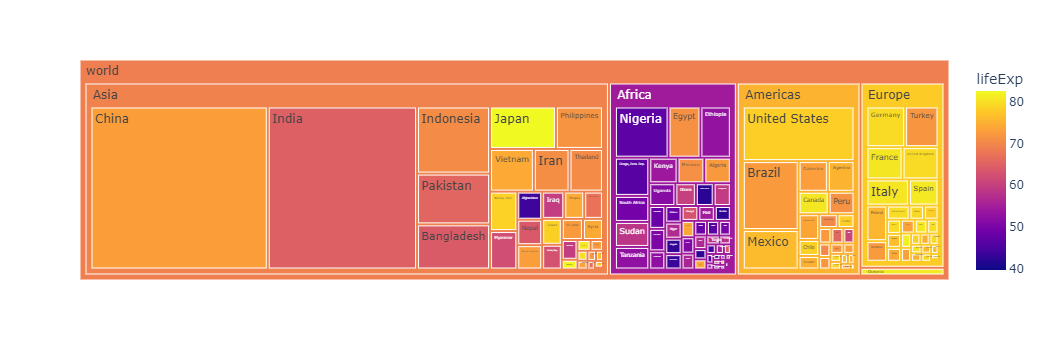

In [29]:
## tree map
px.treemap(
    gapminder_dataset.query("year==2007"),
    path=[px.Constant("world"), 'continent', 'country'],
    values='pop',
    color='lifeExp'
)